The president of a small manufacturing firm is concerned
about the continual increase in manufacturing costs over the past several years. The fol-
lowing figures provide a time series of the cost per unit for the firm’s leading product
over the past eight years:

a. Construct a time series plot. What type of pattern exists in the data?

b. Use simple linear regression analysis to find the parameters for the line that mini-
mizes MSE for this time series.

c. What is the average cost increase that the firm has been realizing per year?

d. Compute an estimate of the cost/unit for the next year.

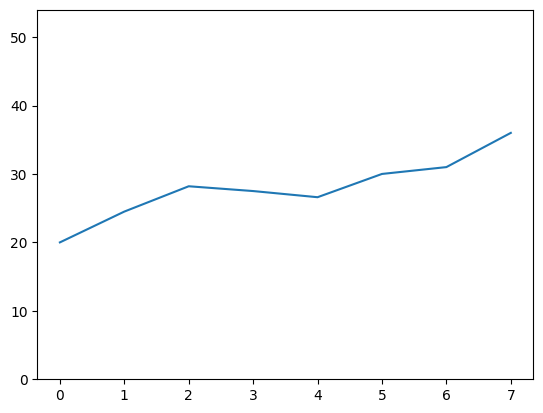

In [8]:
year = [1,2,3,4,5,6,7,8]
data = [20.00,24.50,28.20,27.50,26.60,30.00,31.00,36.00]

import matplotlib.pyplot as plt
plt.ylim(bottom = 0, top = max(data)*1.5)
plt.plot(data)

In [9]:
from docplex.mp.model import Model

m = Model()

b_0 = m.continuous_var(name = 'Intercept')
b_1 = m.continuous_var(name = 'Slope')

mse = []
for i in range(len(year)):
    mse.append((b_0 + b_1 * year[i] - data[i])**2)

m.minimize(sum(mse))

In [10]:
solution = m.solve(log_output = True)

Version identifier: 22.1.1.0 | 2023-02-11 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Number of nonzeros in lower triangle of Q = 1
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.01 sec. (0.00 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 2
  Integer space required    = 2
  Total non-zeros in factor = 3
  Total FP ops to factor    = 5
Tried aggregator 1 time.
QP Presolve added 0 rows and 2 columns.
Reduced QP has 2 rows, 4 columns, and 5 nonzeros.
Reduced QP objective Q matrix has 2 nonzeros.
Presolve time = 0.05 sec. (0.00 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 2
  Integer space required    = 2
  Total non-zeros in factor = 3
  Total FP ops t

  16   2.3346190e+01   2.3346142e+01  1.78e-15  0.00e+00  2.22e-13
Barrier time = 0.11 sec. (0.02 ticks)

Total time on 4 threads = 0.11 sec. (0.02 ticks)


In [11]:
print(solution)

solution for: docplex_model2
objective: 23.3462
status: OPTIMAL_SOLUTION(2)
Intercept=19.993
Slope=1.774

